In [1]:
import numpy as np
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
%matplotlib notebook
                     # NOTE: all "magic" options for backend plotting are: inline, notebook, and "external" (default) 
                     # see  http://ipython.readthedocs.io/en/stable/interactive/plotting.html for details

<IPython.core.display.Javascript object>


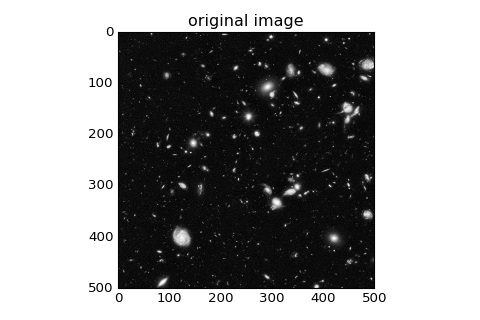

In [2]:
from scipy import misc
from skimage import data
from skimage.color import rgb2gray

image = data.hubble_deep_field()[0:500, 0:500]
#image = img.imread("../images/IMG_3306.jpg")
#image = data.astronaut()
#image = data.camera()


image_gray = rgb2gray(image)

plt.figure(1,figsize = (6, 4))
plt.imshow(image_gray, cmap = "gray")
plt.title("original image")

plt.show()

# "Blob" features - DOG at different scales ($\sigma$) 

<IPython.core.display.Javascript object>


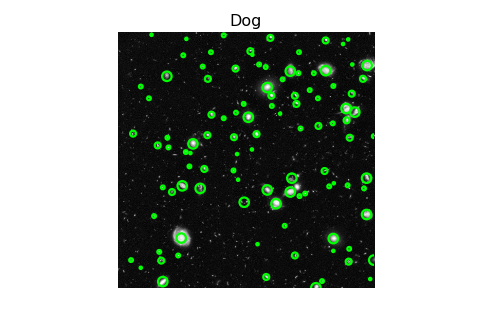

In [3]:
from math import sqrt
from skimage.feature import blob_dog, blob_log

blobs = blob_dog(image_gray, min_sigma=1, max_sigma=10, threshold=0.2, overlap=0.2)
blobs[:,2] = sqrt(2) * blobs[:,2]   #converting sigmas/scales to radii

fig = plt.figure(2,figsize = (6, 4))
ax = fig.add_subplot(111)
ax.set_title("Dog")
ax.imshow(image_gray, cmap = "gray")
for blob in blobs:
    y, x, r = blob
    ax.add_patch(plt.Circle((x, y), r, color="lime", linewidth=2, fill=False))
ax.set_axis_off()
    
plt.show()

# Harris corners

<IPython.core.display.Javascript object>


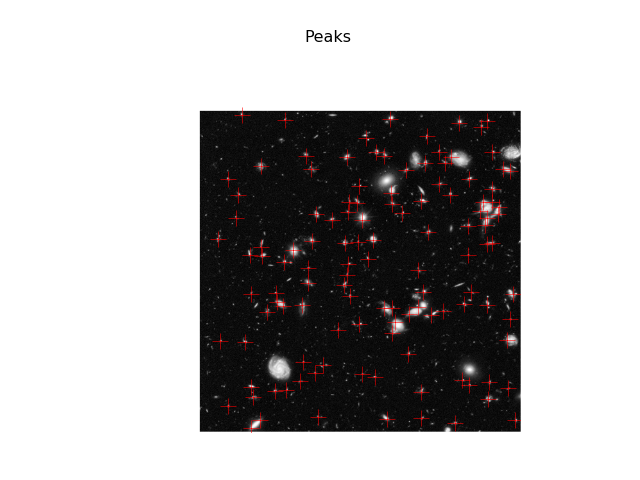

In [4]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse

HCfilter = corner_harris(image_gray, k=0.1, sigma = 4)
Peaks = corner_peaks(HCfilter, min_distance=5)

fig, ax = plt.subplots(1, 1)
ax.imshow(image_gray, cmap="gray")
ax.plot(Peaks[:,1], Peaks[:,0], '+r', markersize=15)
ax.set_title("Peaks")
ax.set_axis_off()

plt.show(fig)